# Original Code

The code in the next few cells is taken directly from **Formulation of quantized Hamiltonian dynamics in terms of natural variables** by Akimov et. al

In [1]:
import math

hbar = 0.6582  # eV * fs


def integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q = q + p*dt/mass
    return q

def integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q2 = q2 + 2.0*pq*dt/mass
    return q2

def integrate_p(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p = p + 2.0*alp*D*(x2-x)*dt
    return p

def integrate_p2(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p2 = p2 + dt*4.0*alp*D*( (x2 - 2.0*x*x)*p + (2.0*x-1.0)*xp ) 
    return p2

def integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    pq = pq + dt*(p2/mass) + dt*2.0*alp*D*( (x2 - 2.0*x*x)*q + (2.0*x-1.0)*xq ) 
    return pq

def integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x = x - alp*xp*dt/mass
    return x

def integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    x2 = math.exp(-2.0*alp*p*dt/mass)*x2
    x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    return x2

def integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    xp = math.exp(-2.0*alp*p*dt/mass)*xp
    xp = xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    return xp

def integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xq = xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) )
    xq = math.exp(-alp*p*dt/mass)*xq
    xq = xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) )
    return xq


def gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    q  = integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)

    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    Ekin_cl = 0.5*p*p/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(math.exp(-2.0*alp*q) - 2.0*math.exp(-alp*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

    return [q,p,pq,q2,p2,x,x2,xp,xq, Etot, Etot_cl]



def solve(mass,q0,p0,s0,ps0,T,dt,filename):

    alp = 2.567
    D = 4.419 # eV
#    D = 1.0

    f1=open(filename,"w")
    t = 0.0    
    Etot = 0.0
    Etot0 = 0.0
    Etot_cl = 0.0
    Etot_cl0 = 0.0
    q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    q, p = q0, p0
    q2 = q*q + s0*s0
    pq = ps0*s0 + q*p
    p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
    x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
    x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
    xq = x*(q-alp*s0*s0)
    xp = x*(p - s0*ps0*alp)

    q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,0.0,mass,alp,D)
    Etot, Etot_cl = Etot0,Etot_cl0

    line = str(t)+"  "+str(Etot/Etot0)+"  "
    i=0
    while i<1:        
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0
        line = line +str(q)+"  "+str(p)+"  "+str(s)+"  "+str(ps)+"  "
        i = i+1
    line = line +str(Etot)+"  "+str(Etot_cl)+"\n"
    f1.write(line)
    

    while t<=T:
        q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)
        t = t + dt
        line = str(t)+"  "+str(Etot/Etot0)+"  "
        i=0
        while i<1:
            s = (q2 - q*q)
            if s>0.0:
                s = math.sqrt(s)
            else: 
                s = 0.0
            if s>0.0:
                ps = (pq - p*q)/s
            else: 
                ps = 0.0

            line = line +str(q)+"  "+str(p)+"  "+str(s)+"  "+str(ps)+"  "
            i = i+1
        line = line +str(Etot)+"  "+str(Etot_cl)+"\n"
        f1.write(line)

    f1.close()


#convert = (1.0/17.102)
convert = (1.0/17.586)  # More accurate value !
solve(2980.0*convert, 0.15, 0.0, 0.05, 0.0, 500, 0.01,"o4")

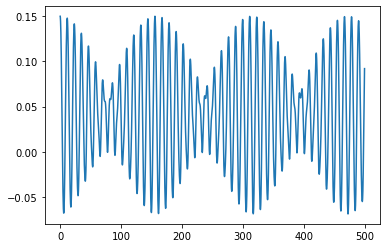

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("o4")[:,0]
y = np.loadtxt("o4")[:,2]

plt.plot(x, y)

The above is the correct QHD result that I have tried to replicate with my own code.

# My Code

In [80]:
from QHD import *
import math

def symmetrize(expr):
    expr1 = str(expr)
    expr1 = expr1.replace("p*x2", "x*(xp - x*p)").replace("p*x", "px")
    return eval(expr1)

The main purpose of my code is to be able to derive formulas automatically, as seen through the QHD example. This is done in the below cells.

1. Calcuating the derivatives.

In [ ]:
# First, we must define all the parameters as stated in section 1 as symbols:

D, alpha, q_0, q = symbols("D, alpha, q_0, q")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

x = Symbol("x")

diff11 = diff1.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff22 = diff2.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

Now that the derivatives are computed, the equations of motion can be derived.

In [88]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
q_0 = 0.0
########## EOM Calculations ##########

# If you want to see the output of any of the below, uncomment the desired print line. #

# There are two ways to derive the EOM's, using the `time_deriv` function and then the original way is with `QHD_int`
# The `time_deriv` function is used as it's more versatile at this time, however it's still not perfect.
# `QHD_int` uses the `time_deriv` function

px = xp
q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))

x = exp(-alpha*q)
x1 = sympify(str(time_deriv(x, 1)).replace("exp(-alpha*q)", "x"))
x1 = str((symmetrize(x1))*(0.5)*dt + Symbol("x"))
x21 = sympify(str(time_deriv(x, 2)).replace("exp(-2*alpha*q)", "x2"))
x21 = str(symmetrize(x21)*(0.5)*dt + Symbol("x2"))
print("x = " + str(x1))

xp1 = str(QHD_int(xp, 1, 0.5*dt))
#print("xp = " + str(xp1))

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = str(p1).replace("exp(-2*alpha*q)", "x2").replace("alpha**2", "0")
p1 = sympify(p1)
p1 = str(symmetrize(p1)*(0.5)*dt + p).replace("exp(-alpha*q)", "x")
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = str(p21).replace("exp(-alpha*q)", "x").replace("exp(-2*alpha*q)", "x2").replace("alpha**2", "0")
p21 = str(symmetrize(p21)*(0.5)*dt + p2).replace("exp(-alpha*q)", "x")
print("p2 = " + str(p21))

q = dt*p/mass + q
x = -0.5*alpha*dt*xp/mass + x
p = dt*(1.0*D*alpha*x2 - 1.0*D*alpha*x) + p
p2 = dt*(2.0*D*alpha*xp - 2.0*D*alpha*(-p*x + xp)*x) + p2


There are issues with the x2, p2, and xp operators due to the symmetry issues. I have to reexamine the best way to calculate these. There also seems to be a difference in how these operators are presented in the original paper versus what was coded, so I have to reassess (example: the x2 operator that I made matches the paper but not the code to my knowledge)

In [94]:
hbar = 0.6582  # eV * fs
convert = (1.0/17.586)
mass, q0, p0, s0, ps0, T, dt = 2980.0*convert, 0.15, 0.0, 0.05, 0.0, 500, 0.1

alp = 2.567
alpha = alp
D = 4.419


t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

x = eval(x1)

p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

p = eval(p1)

q = eval(q1)

p = eval(p1)

p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

x = eval(x1)

x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

In [95]:
q_list = []
t_list = []

i=0
while i<1:        
    s = (q2 - q*q)
    if s>0.0:
        s = math.sqrt(s)
    else: 
        s = 0.0
    if s>0.0:
        ps = (pq - p*q)/s
    else: 
        ps = 0.0
    i = i+1
    q_list.append(q)
    t_list.append(t)


while t<=T:
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    x = eval(x1)

    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    p = eval(p1)

    q = eval(q1)

    p = eval(p1)

    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    x = eval(x1)

    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    t = t + dt
    i=0
    while i<1:
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0

        i = i+1
        q_list.append(q)
        t_list.append(t)

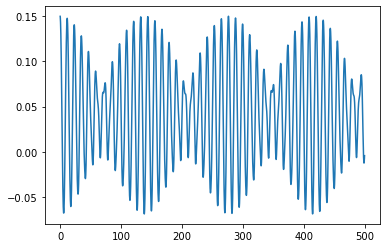

In [96]:
plt.plot(t_list, q_list)